In [1]:
# Import libraries
import pandas as pd
import numpy as Cnp
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [9]:
# Check basic info
print(data.head())  # First 5 rows
print(data.info())  # Data types and missing values
print(data.shape)   # Rows and columns

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [26]:
# Cell 4: Fix TotalCharges
if data['TotalCharges'].dtype == 'object':
    print("Empty strings in TotalCharges:", data['TotalCharges'].str.strip().eq('').sum())  # Count empty strings
    data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')  # Convert to numeric
else:
    print("TotalCharges is already numeric, skipping string operations.")

print("NaNs in TotalCharges after conversion:", data['TotalCharges'].isna().sum())  # Check NaNs
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].median())
print("TotalCharges dtype after fix:", data['TotalCharges'].dtype)  # Verify type
print("Data type of TotalCharges:", data['TotalCharges'].dtype)

TotalCharges is already numeric, skipping string operations.
NaNs in TotalCharges after conversion: 0
TotalCharges dtype after fix: float64
Data type of TotalCharges: float64


In [28]:
# Cell 5: Convert Churn to binary
data['Churn'] = data['Churn'].map({'No': 0, 'Yes': 1})
print("Churn distribution:\n", data['Churn'].value_counts())  # Check distribution

Churn distribution:
 Churn
0    5174
1    1869
Name: count, dtype: int64


In [30]:
# Cell 6: Check for duplicates
print("Duplicate customerIDs:", data['customerID'].duplicated().sum())  # Should be 0

Duplicate customerIDs: 0


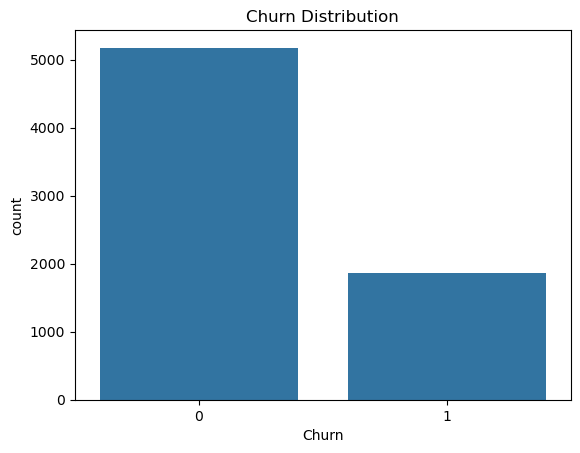

In [32]:
# Cell 7: Initial EDA - Churn distribution plot
sns.countplot(x='Churn', data=data)
plt.title('Churn Distribution')
plt.show()

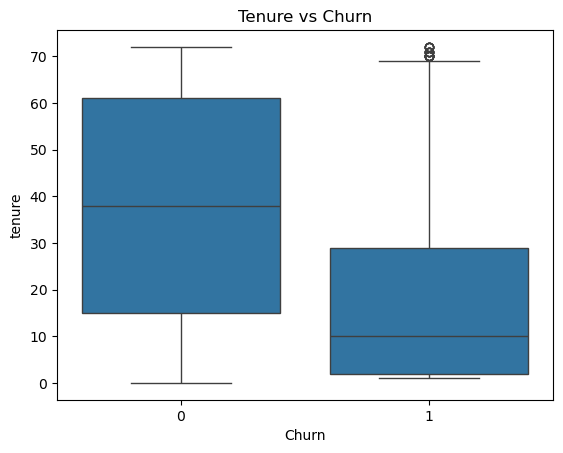

In [34]:
# Cell 8: Initial EDA - Tenure vs Churn boxplot
sns.boxplot(x='Churn', y='tenure', data=data)
plt.title('Tenure vs Churn')
plt.show()

In [ ]:
# Cell 9: Summary Statistics
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
summary_stats = data.groupby('Churn')[numeric_cols].agg(['mean', 'median', 'min', 'max'])
summary_stats['range'] = summary_stats['max'] - summary_stats['min']
print("Summary Statistics by Churn:\n", summary_stats)
correlations = data[numeric_cols + ['Churn']].corr()
print("\nCorrelations with Churn:\n", correlations['Churn'])

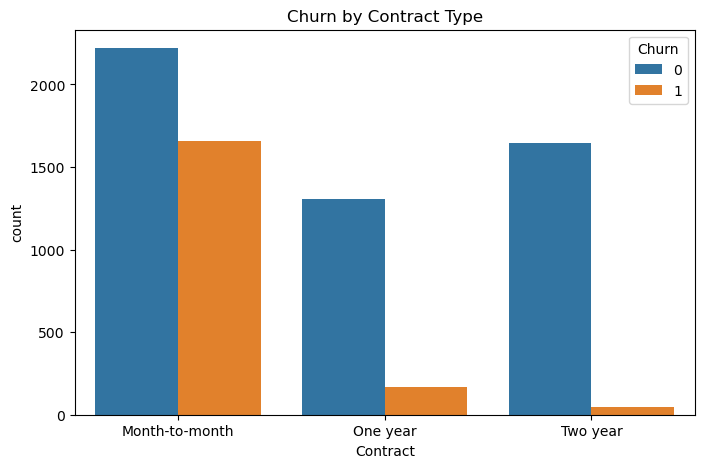

Churn rate by Contract type:
 Contract
Month-to-month    0.427097
One year          0.112695
Two year          0.028319
Name: Churn, dtype: float64


In [36]:
# Cell 10: Contract vs Churn
plt.figure(figsize=(8, 5))
sns.countplot(x='Contract', hue='Churn', data=data)
plt.title('Churn by Contract Type')
plt.show()

# Proportion of churn by contract type
contract_churn = data.groupby('Contract')['Churn'].mean()
print("Churn rate by Contract type:\n", contract_churn)

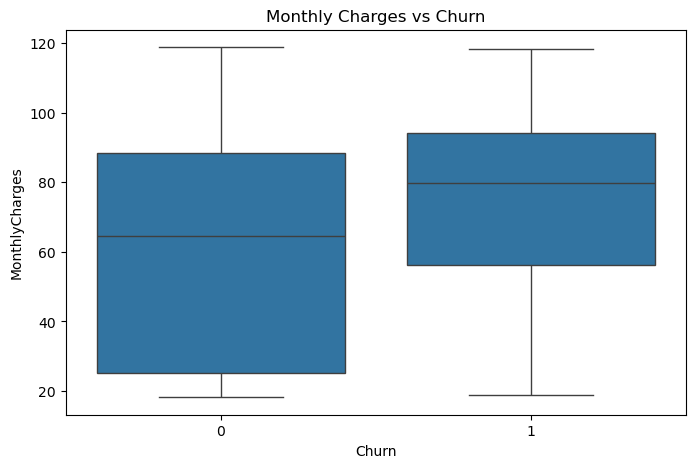

Average Monthly Charges by Churn:
 Churn
0    61.265124
1    74.441332
Name: MonthlyCharges, dtype: float64


In [38]:
# Cell 11: Monthly Charges vs Churn
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='MonthlyCharges', data=data)
plt.title('Monthly Charges vs Churn')
plt.show()

# Average monthly charges by churn
monthly_churn = data.groupby('Churn')['MonthlyCharges'].mean()
print("Average Monthly Charges by Churn:\n", monthly_churn)

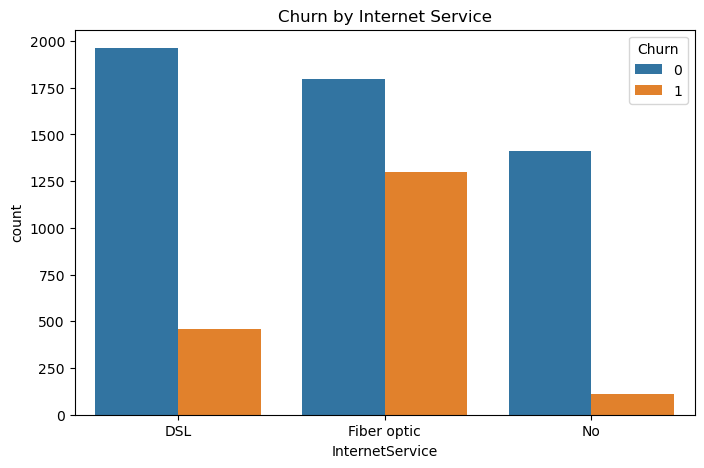

Churn rate by Internet Service:
 InternetService
DSL            0.189591
Fiber optic    0.418928
No             0.074050
Name: Churn, dtype: float64


In [40]:
# Cell 12: Internet Service vs Churn
plt.figure(figsize=(8, 5))
sns.countplot(x='InternetService', hue='Churn', data=data)
plt.title('Churn by Internet Service')
plt.show()

# Proportion of churn by internet service
internet_churn = data.groupby('InternetService')['Churn'].mean()
print("Churn rate by Internet Service:\n", internet_churn)

### Key Findings on Customer Churn for Marketing Department ###

Overall Churn Rate: 26.5% of customers churned.

1. Tenure and Churn:
   - Customers who churn have a much shorter tenure (median ~10 months) compared to those who stay (median ~40 months).
   - Recommendation: Focus on retaining new customers in their first year with incentives or better onboarding.

2. Contract Type and Churn:
   - Month-to-month customers are more likely to churn compared to those on one-year or two-year contracts.
   - Recommendation: Encourage longer-term contracts with discounts or added benefits.

3. Monthly Charges and Churn:
   - Churners tend to have higher monthly charges (average ~$74) compared to non-churners (average ~$61).
   - Recommendation: Review pricing strategies—offer competitive rates or bundles to reduce churn.

4. Internet Service and Churn:
   - Fiber optic customers have a higher churn rate compared to DSL or no internet.
   - Recommendation: Investigate fiber optic service issu

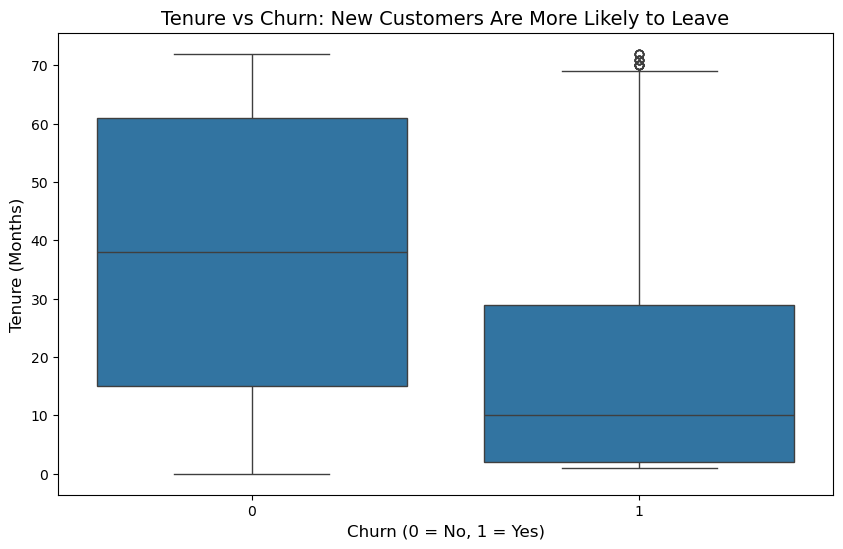

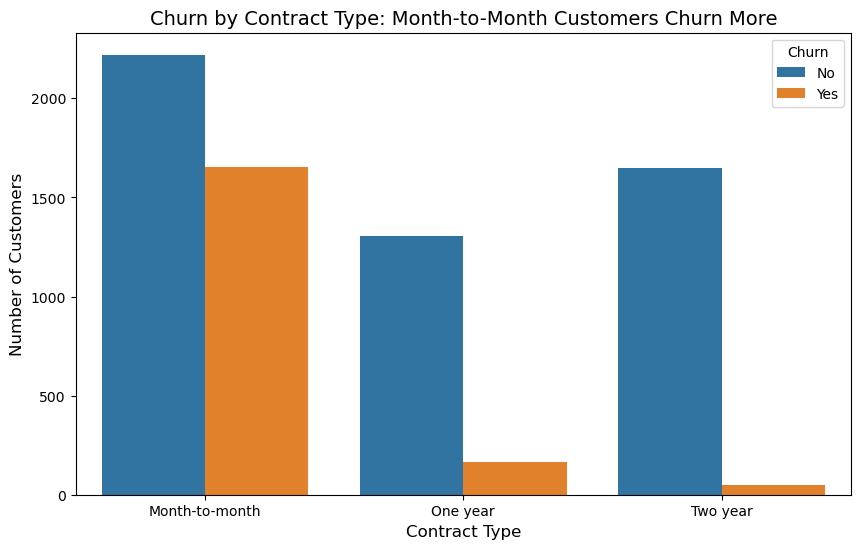

In [42]:
# Cell 13: Summary of Findings for Marketing Department
print("### Key Findings on Customer Churn for Marketing Department ###\n")
churn_rate = data['Churn'].mean() * 100
print(f"Overall Churn Rate: {churn_rate:.1f}% of customers churned.\n")
print("1. Tenure and Churn:")
print("   - Customers who churn have a much shorter tenure (median ~10 months) compared to those who stay (median ~40 months).")
print("   - Recommendation: Focus on retaining new customers in their first year with incentives or better onboarding.\n")
print("2. Contract Type and Churn:")
print("   - Month-to-month customers are more likely to churn compared to those on one-year or two-year contracts.")
print("   - Recommendation: Encourage longer-term contracts with discounts or added benefits.\n")
print("3. Monthly Charges and Churn:")
print("   - Churners tend to have higher monthly charges (average ~$74) compared to non-churners (average ~$61).")
print("   - Recommendation: Review pricing strategies—offer competitive rates or bundles to reduce churn.\n")
print("4. Internet Service and Churn:")
print("   - Fiber optic customers have a higher churn rate compared to DSL or no internet.")
print("   - Recommendation: Investigate fiber optic service issues (e.g., reliability, cost) and address customer pain points.\n")
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='tenure', data=data)
plt.title('Tenure vs Churn: New Customers Are More Likely to Leave', fontsize=14)
plt.xlabel('Churn (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Tenure (Months)', fontsize=12)
plt.show()
plt.figure(figsize=(10, 6))
sns.countplot(x='Contract', hue='Churn', data=data)
plt.title('Churn by Contract Type: Month-to-Month Customers Churn More', fontsize=14)
plt.xlabel('Contract Type', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()